# yfinance란?

[yfinance](https://pypi.org/project/yfinance/)는 랜 애루시(Ran Aroussi)가 개발한 오픈 소스 라이브러리입니다. 이 라이브러리는 [야후 파이낸스(Yahoo! Finance)](https://finance.yahoo.com/)를 통해 금융 데이터를 액세스할 수 있도록 만들어졌습니다. 야후 파이낸스는 주식, 채권, 통화 및 암호화폐에 대한 광범위한 시장 데이터를 제공하고 있습니다.

yfinance 패키지 설치

In [ ]:
!pip install yfinance --quiet

     |████████████████████████████████| 62 kB 1.2 MB/s 


# yfinance의 기본구조

In [ ]:
import yfinance as yf

### 티커 객체 정의하기

`yfinance`를 사용하기 위해서는 먼저 티커를 선택하고 이를 객체화하는 작업이 필요합니다. 티커(Ticker)란 금융시장에서 특정 종목을 표현하는 약자를 의미합니다. 가령 애플의 경우 주식시장에서 'AAPL'이라는 티커를 가지고 있고, 마이크로소프트의 경우 'MSFT'라는 티커를 가지고 있습니다. 이 티커는 당연히 각 종목별로 고유한 값입니다. `yfinance`에서는 티커를 객체화하기 위해 `Ticker()`라는 메서드를 사용하고 있습니다. 여기서는 간단하게 애플의 티커 객체를 구현해보겠습니다.

In [ ]:
aapl = yf.Ticker('AAPL')
print(aapl)

yfinance.Ticker object <AAPL>


### 종목 기본정보

이제 티커를 정의했으니 해당 종목이 어떤 종목인지 기본적인 정보를 출력해보겠습니다. 티커 객체는 `info`라는 속성(Attribute)을 가지고 있습니다. 이를 활용하면 종목에 대한 세세한 정보를 얻을 수 있습니다. 

In [ ]:
aapl.info

### 시장 데이터 다운로드

종목의 과거 가격 및 거래량에 대한 데이터를 다운받기 위해서는 `history()`라는 메서드를 사용하면 됩니다. 이 메서드는 단일 종목 혹은 여러 종목들에 대한 시장 데이터를 가져와 우리에게 전달해주는 역할을 하고 있습니다.

우선 가장 단순하게 구현을 하기 위해 애플 주식의 가능한 한 많은 일별 데이터를 가져와보도록 하겠습니다.

In [ ]:
data = aapl.history(period='max')
data

애플 주식에 대한 과거 데이터가 잘 들어오는 것을 확인할 수 있습니다. 간단히 종가를 기준으로 가격 그래프를 만들어보겠습니다. 앞으로 우리는 이 `history()` 메서드를 사용하여 여러 ETF들에 대한 과거 데이터를 다운받아 사용할 것입니다.

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data['Close'])

`history()` 메서드는 몇 가지 인자를 받아 이에 맞게 데이터 쿼리 작업을 처리할 수 있습니다. 아래는 `history()` 메서드가 가지고 있는 인자(Parameter)와 이에 대한 설명입니다.


- `period` : 데이터를 다운받을 기간을 설정합니다. 기본값은 한달(`1mo`)입니다. (`1d`, `5d`, `1mo`, `3mo`, `6mo`, `1y`, `2y`, `5y`, `10y`, `ytd`, `max`)
- `interval` : 데이터의 주기를 설정합니다. 주기를 일별보다 낮은 장중으로 설정할 경우 최대 60일간의 데이터만 제공합니다. 기본값은 하루(`1d`)입니다. (`1m`, `2m`, `5m`, `15m`, `30m`, `60m`, `90m`, `1h`, `1d`, `5d`, `1wk`, `1mo`, `3mo`)
- `start` : `period` 인자를 사용하지 않을 경우 데이터의 시작일을 설정합니다. `'YYYY-MM-DD'` 문자열을 사용하거나 `datetime` 형식의 날짜를 사용합니다.
- `end` : `period` 인자를 사용하지 않을 경우 데이터의 종료일을 설정합니다. `'YYYY-MM-DD'` 문자열을 사용하거나 `datetime` 형식의 날짜를 사용합니다.
- `prepost` : 시간외거래의 데이터를 결과에 포함시킬것인지를 설정합니다. 기본값은 `False`입니다.
- `auto_adjust` : 자동으로 수정주가를 사용할 것인지를 설정합니다. 기본값은 `True`입니다.
- `actions` : 주식의 경우 배당이나 주식 분할 같은 기업공시 이벤트를 다운받을지를 설정합니다. 기본값은 `True`입니다.

In [ ]:
data = aapl.history(start='2015-01-01', end='2022-03-11', actions=False)
data.tail()

In [ ]:
data['Close'].iloc[-250:].plot()

### 기타 데이터 다운로드

`yfinance`는 가격 데이터 뿐만 아니라 재무 데이터, 대주주 보유 현황, 애널리스트 의견, 뉴스 데이터 또한 제공합니다. 아래의 리스트는 `yfinance`를 통해 얻을 수 있는 주요 데이터를 가져올 수 있는 속성값들입니다.

- `financials` : 연도별 재무제표
- `quarterly_financials` : 분기별 재무제표
- `balance_sheet` : 연도별 대차대조표
- `quarterly_balance_sheet` : 분기별 대차대조표
- `cashflow` : 연도별 현금흐름표
- `quaterly_cashflow` : 분기별 현금흐름표
- `earnings` : 연도별 실적
- `quarterly_earnings` : 분기별 실적
- `institutional_holders` : 주요 기관 대주주 보유현황
- `recommendations` : 애널리스트 의견
- `news` : 최근 뉴스

In [ ]:
# 연도별 재무제표
aapl.financials

In [ ]:
# 분기별 재무제표
aapl.quarterly_financials

In [ ]:
# 연도별 대차대조표
aapl.balance_sheet

,2021-09-25,2020-09-26,2019-09-28,2018-09-29
Total Liab,2.879120e+11,2.585490e+11,2.480280e+11,2.585780e+11
Total Stockholder Equity,6.309000e+10,6.533900e+10,9.048800e+10,1.071470e+11
Other Current Liab,5.357700e+10,4.786700e+10,4.324200e+10,3.929300e+10
Total Assets,3.510020e+11,3.238880e+11,3.385160e+11,3.657250e+11
Common Stock,5.736500e+10,5.077900e+10,4.517400e+10,4.020100e+10
Other Current Assets,1.411100e+10,1.126400e+10,1.235200e+10,1.208700e+10
Retained Earnings,5.562000e+09,1.496600e+10,4.589800e+10,7.040000e+10
Other Liab,4.305000e+10,4.610800e+10,5.050300e+10,4.891400e+10
Gains Losses Not Affecting Retained Earnings,1.630000e+08,-4.060000e+08,-5.840000e+08,-3.454000e+09
Other Assets,3.876200e+10,3.395200e+10,3.297800e+10,2.228300e+10


In [ ]:
# 분기별 대차대조표
aapl.quarterly_balance_sheet

In [ ]:
# 연도별 현금흐름표
aapl.cashflow

In [ ]:
# 분기별 현금흐름표
aapl.quarterly_cashflow

In [ ]:
# 연도별 실적
aapl.earnings

In [ ]:
# 분기별 실적
aapl.quarterly_earnings

In [ ]:
# 주요 기관 보유현황
aapl.institutional_holders

In [ ]:
# 애널리스트 의견
aapl.recommendations[aapl.recommendations['Firm'] == 'Morgan Stanley']

In [ ]:
# 최근 뉴스
aapl.news

# yfinance로 ETF 가격 데이터 다운로드하기

### 여러 종목 데이터 한꺼번에 받기

지금까지는 단일 종목에 대한 데이터 쿼리에 대해서만 다루었습니다. 그런데 만약  여러 종목들에 대한 데이터를 한꺼번에 받고 싶다면 어떻게 해야할까요? 이런 경우에도 방법은 똑같습니다. 다만 여러 종목들에 대한 티커 객체를 만들고자 한다면 `Ticker()` 메서드가 아닌 `Tickers()` 메서드를 사용해야 합니다. SPY와 TLT, 두 가지 ETF의 가격 데이터를 다운로드해보겠습니다. SPY는 S&P 500 지수를 추종하는 ETF이며, TLT는 미국 장기채를 추종하는 ETF입니다. 각각 미국 주식과 미국 채권을 대표하는 ETF라고 할 수 있습니다.

In [ ]:
tickers = ['SPY', 'TLT']

etf = yf.Tickers(tickers)

data = etf.history(start='2002-08-01', actions=False)
data

각각의 ETF에 대해 OHLCV 데이터가 들어오는 것을 확인할 수 있습니다. 만약 종가 데이터만 필요하다면 판다스 데이터프레임의 [`drop()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)과 [`droplevel()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.droplevel.html) 메서드를 사용해 데이터를 축약할 수 있습니다.

In [ ]:
data.drop(['Open', 'Low', 'High', 'Volume'], inplace=True, axis=1)
data

In [ ]:
data = data.droplevel(0, axis=1)
data

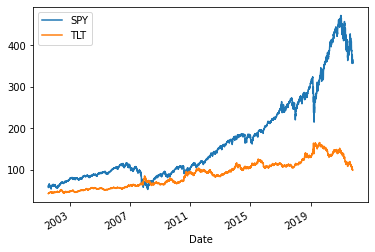

In [ ]:
data.plot()

### 입력변수: 수익률, 변동성, 상관계수

#### 1. 수익률

Text(0, 0.5, 'Returns')

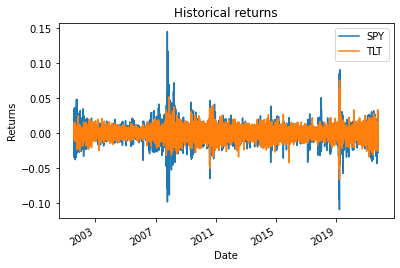

In [ ]:
# 수익률 계산
rets = data.pct_change().fillna(0)

# 수익률 데이터 확인
rets.head()

# 수익률 데이터 시각화
rets.plot()
plt.title('Historical returns')
plt.xlabel('Date')
plt.ylabel('Returns')

#### 2. 변동성

In [ ]:
import numpy as np

In [ ]:
# 전체 기간 변동성 계산
total_vols = rets.std() * np.sqrt(252)
total_vols

# 1년 단위 롤링 변동성 계산 및 연율화
vols = rets.rolling(252).std() * np.sqrt(252)
vols

# 변동성 시각화
vols.plot()
plt.title('Historical Vols')
plt.xlabel('Date')
plt.ylabel('Vols')

#### 3. 상관계수

In [ ]:
# SPY와 TLT의 수익률
spy_rets = rets['SPY']
tlt_rets = rets['TLT']

# 전체 기간 상관계수 계산
total_corr = spy_rets.corr(tlt_rets)
total_corr

# 1년 단위 롤링 상관계수 계산
corr = spy_rets.rolling(252).corr(tlt_rets)
corr

# 상관계수 시각화
corr.plot()
plt.title('Historical Correlation')
plt.xlabel('Date')
plt.ylabel('Correlation')

#### 4. ETF 유니버스 데이터 처리

#### ETF 유니버스

| Ticker | Sector |
| ------ | -----  |
| XLB | 소재 |
| XLE | 에너지 |
| XLF | 금융 |
| XLI | 산업재 |
| XLK | IT |
| XLP | 필수소비재 |
| XLU | 유틸리티 |
| XLV | 헬스케어 |
| XLY | 임의소비재 |

In [ ]:
# ETF 유니버스 티커 설정
tickers = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']

# 티커 객체 선언
yfObj = yf.Tickers(tickers)

# 과거 데이터 다운로드
df = yfObj.history(start='2011-01-01', end='2022-10-14')

# 종가를 제외한 나머지 컬럼 삭제
df.drop(['Open', 'High', 'Low', 'Dividends', 'Stock Splits', 'Volume'], inplace=True, axis=1)

# NaN 값을 이전 값으로 채워넣기
df.ffill(inplace=True)

# 첫 번째 칼럼 레벨 삭제
df = df.droplevel(0, axis=1)

# 주간 단위로 데이터 재설정
df = df.resample('W').last()

In [ ]:
df

In [ ]:
# 역사적 가격 그래프 시각화
df.plot()

In [ ]:
# ETF 수익률 계산
rets = df.pct_change().fillna(0)

# 수익률 시각화
rets.plot(figsize=(12, 8))

In [ ]:
# 1년 단위 롤링 변동성 계산 및 연율화
vols = rets.rolling(52).std() * np.sqrt(52)

# 변동성 시각화
vols.plot(figsize=(12, 8))

In [ ]:
# 전체 기간 ETF 상관계수 계산
corr = rets.corr()
corr

In [ ]:
# seaborn 패키지 임포트
import seaborn as sns

# 히트맵 시각화
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True)

##### 공분산 행렬 특징 이해하기

In [ ]:
# 공분산 계산 및 연율화
cov = rets.cov() * 52
cov

In [ ]:
# var() 메서드를 사용한 ETF 분산 계산
vols_1 = rets.var() * 52
vols_1

In [ ]:
# 공분산 행렬 및 diag() 메서드를 사용한 ETF 분산 계산
vols_2 = np.diag(cov)
vols_2

# 주식-채권 배분 모델

### 패키지 임포트

In [ ]:
# 패키지 임포트
import numpy as np
import yfinance as yf
import seaborn as sns
sns.set()

### 가격 데이터 다운로드 및 전처리

In [ ]:
# 티커
tickers = ['SPY', 'TLT']

# 티커 객체
etf = yf.Tickers(tickers)

# 데이터 다운로드
data = etf.history(start='2002-08-01', actions=False)
data

In [ ]:
# 불필요한 칼럼 제거
data.drop(['Open', 'High', 'Low', 'Volume'], inplace=True, axis=1)
data

In [ ]:
# 0 레벨 칼럼 제목 제거
data = data.droplevel(0, axis=1)
data

In [ ]:
# 가격 그래프
data.plot()

### 일별 수익률 데이터

In [ ]:
# 일별 수익률 데이터
rets = data.pct_change().fillna(0)

# 수익률 데이터 시각화
rets.plot()

### 개별 자산 평균 수익률과 변동성, 샤프비율

In [ ]:
# 주식 기대 수익률과 변동성
stock_mu = rets['SPY'].mean() * 252
stock_sigma = rets['SPY'].std() * np.sqrt(252)

# 주식 샤프 비율
stock_sr = stock_mu / stock_sigma

# 채권 기대 수익률과 변동성
bond_mu = rets['TLT'].mean() * 252
bond_sigma = rets['TLT'].std() * np.sqrt(252)

# 채권 샤프 비율
bond_sr = bond_mu / bond_sigma

# 결과 출력
print(stock_sr, bond_sr)

### 60-40 포트폴리오 구현

In [ ]:
# 주식 가중치 60%, 채권 가중치 40%
weights = 0.6

In [ ]:
# 포트폴리오 수익률
port_ret = weights * rets['SPY'] + (1 - weights) * rets['TLT']

In [ ]:
# NaN 값 제거
port_ret.dropna(inplace=True)

In [ ]:
# 결과 출력
port_ret

In [ ]:
# 그래프 시각화
(1 + port_ret).cumprod().plot()
(1 + rets['SPY']).cumprod().plot()
(1 + rets['TLT']).cumprod().plot()

### 포트폴리오 수익률과 변동성 분석

In [ ]:
# 포트폴리오 기대수익률
port_mu = port_ret.mean() * 252

# 포트폴리오 변동성
port_sigma = port_ret.std() * np.sqrt(252)

# 결과 출력
print('Returns = {}'.format(port_mu))
print('Vol = {}'.format(port_sigma))
print('SR = {}'.format(port_mu / port_sigma))

### 주식-채권 상관계수 분석

In [ ]:
# 1년 롤링 상관계수
historical_corr = rets['SPY'].rolling(252).corr(rets['TLT'])


In [ ]:
# 롤링 상관계수 시각화
historical_corr.plot()

Copyright 2022. 퀀트대디. All rights reserved.